Column----------------- Description

work_year-----------------  The year the salary was paid(2020-2022)

experience_level-----------------   The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

employment_type-----------------   	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

job_title-----------------	The role worked in during the year.

salary-----------------	The total gross salary amount paid.

salary_currency-----------------	The currency of the salary paid as an ISO 4217 currency code.

salaryinusd-----------------	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence-----------------	Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio-----------------	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

company_location-----------------	The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size-----------------	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('ds_salaries.csv',index_col='index')
df.info()
df['work_year']=df['work_year'].astype(str)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [28]:
#prikaz plata po employment_type
#top 5 najplacenijih pozicija po godinama


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

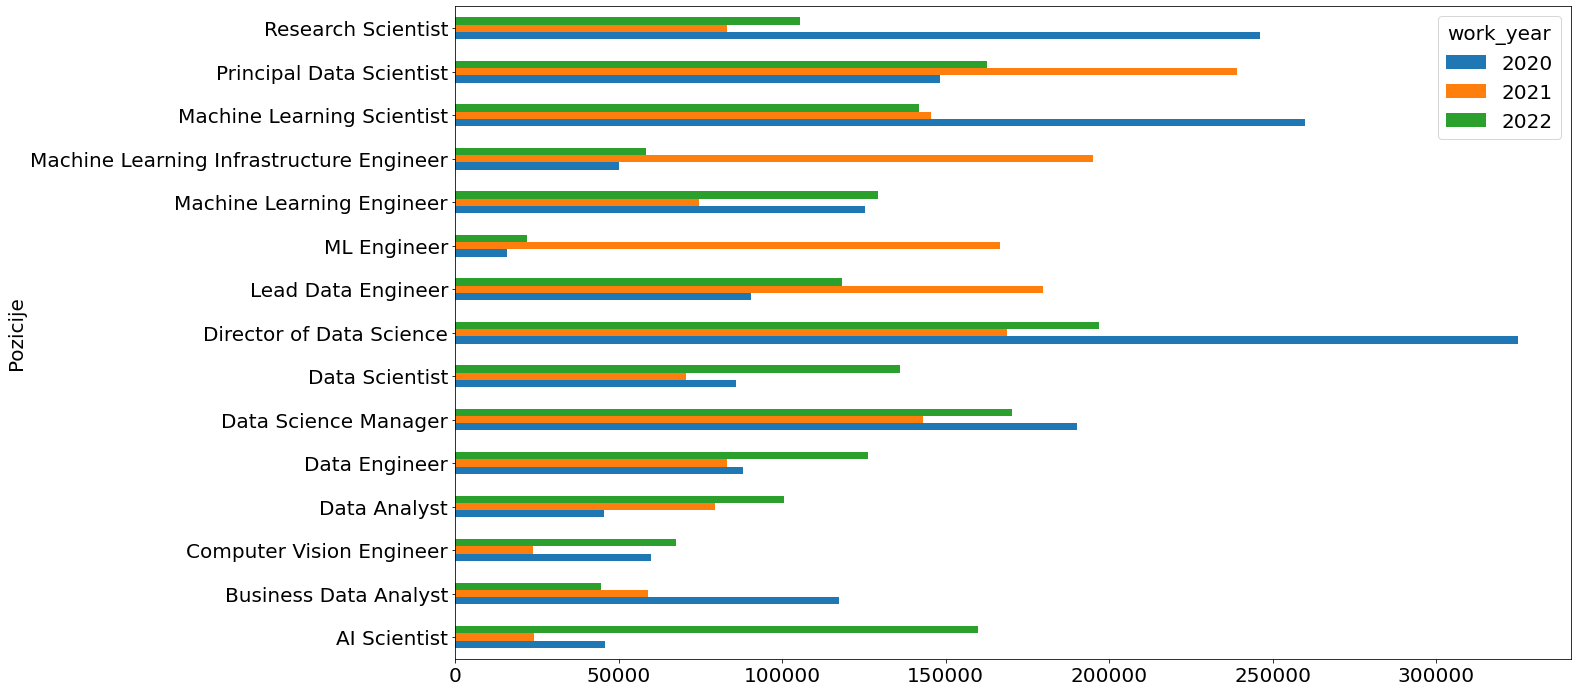

In [83]:
#prikaz prosecnih plata po job_title i godini 
a=df.groupby(['job_title','work_year'])['salary_in_usd'].mean().unstack()

#izbacene su vrednosti koje su bile NaN jer nisu postojale informacije o odredjenim pozicijama za datu godinu
a1=a[~a['2020'].isnull() & ~a['2021'].isnull() & ~a['2022'].isnull()]

a1.plot(kind='barh',figsize=(20,12),xlabel='Pozicije',ylabel='Prosecna plata u USD')
plt.rcParams['font.size']=20

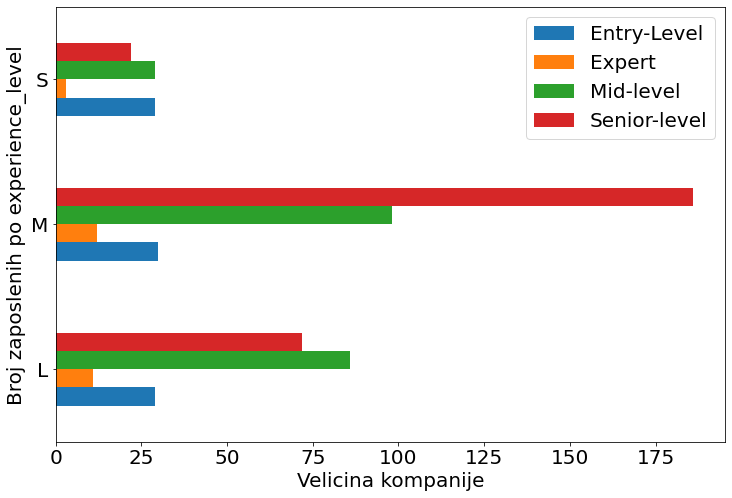

In [82]:
#broj experience_levela po company_size
b=df.groupby(['company_size','experience_level'])['experience_level'].count().unstack()
b.plot(kind='barh',figsize=(12,8))
plt.xticks(rotation=0)
plt.xlabel('Velicina kompanije')
plt.ylabel('Broj zaposlenih po experience_level')
plt.legend(['Entry-Level','Expert','Mid-level','Senior-level'])
plt.rcParams['font.size']=20

<AxesSubplot:ylabel='employment_type,job_title'>

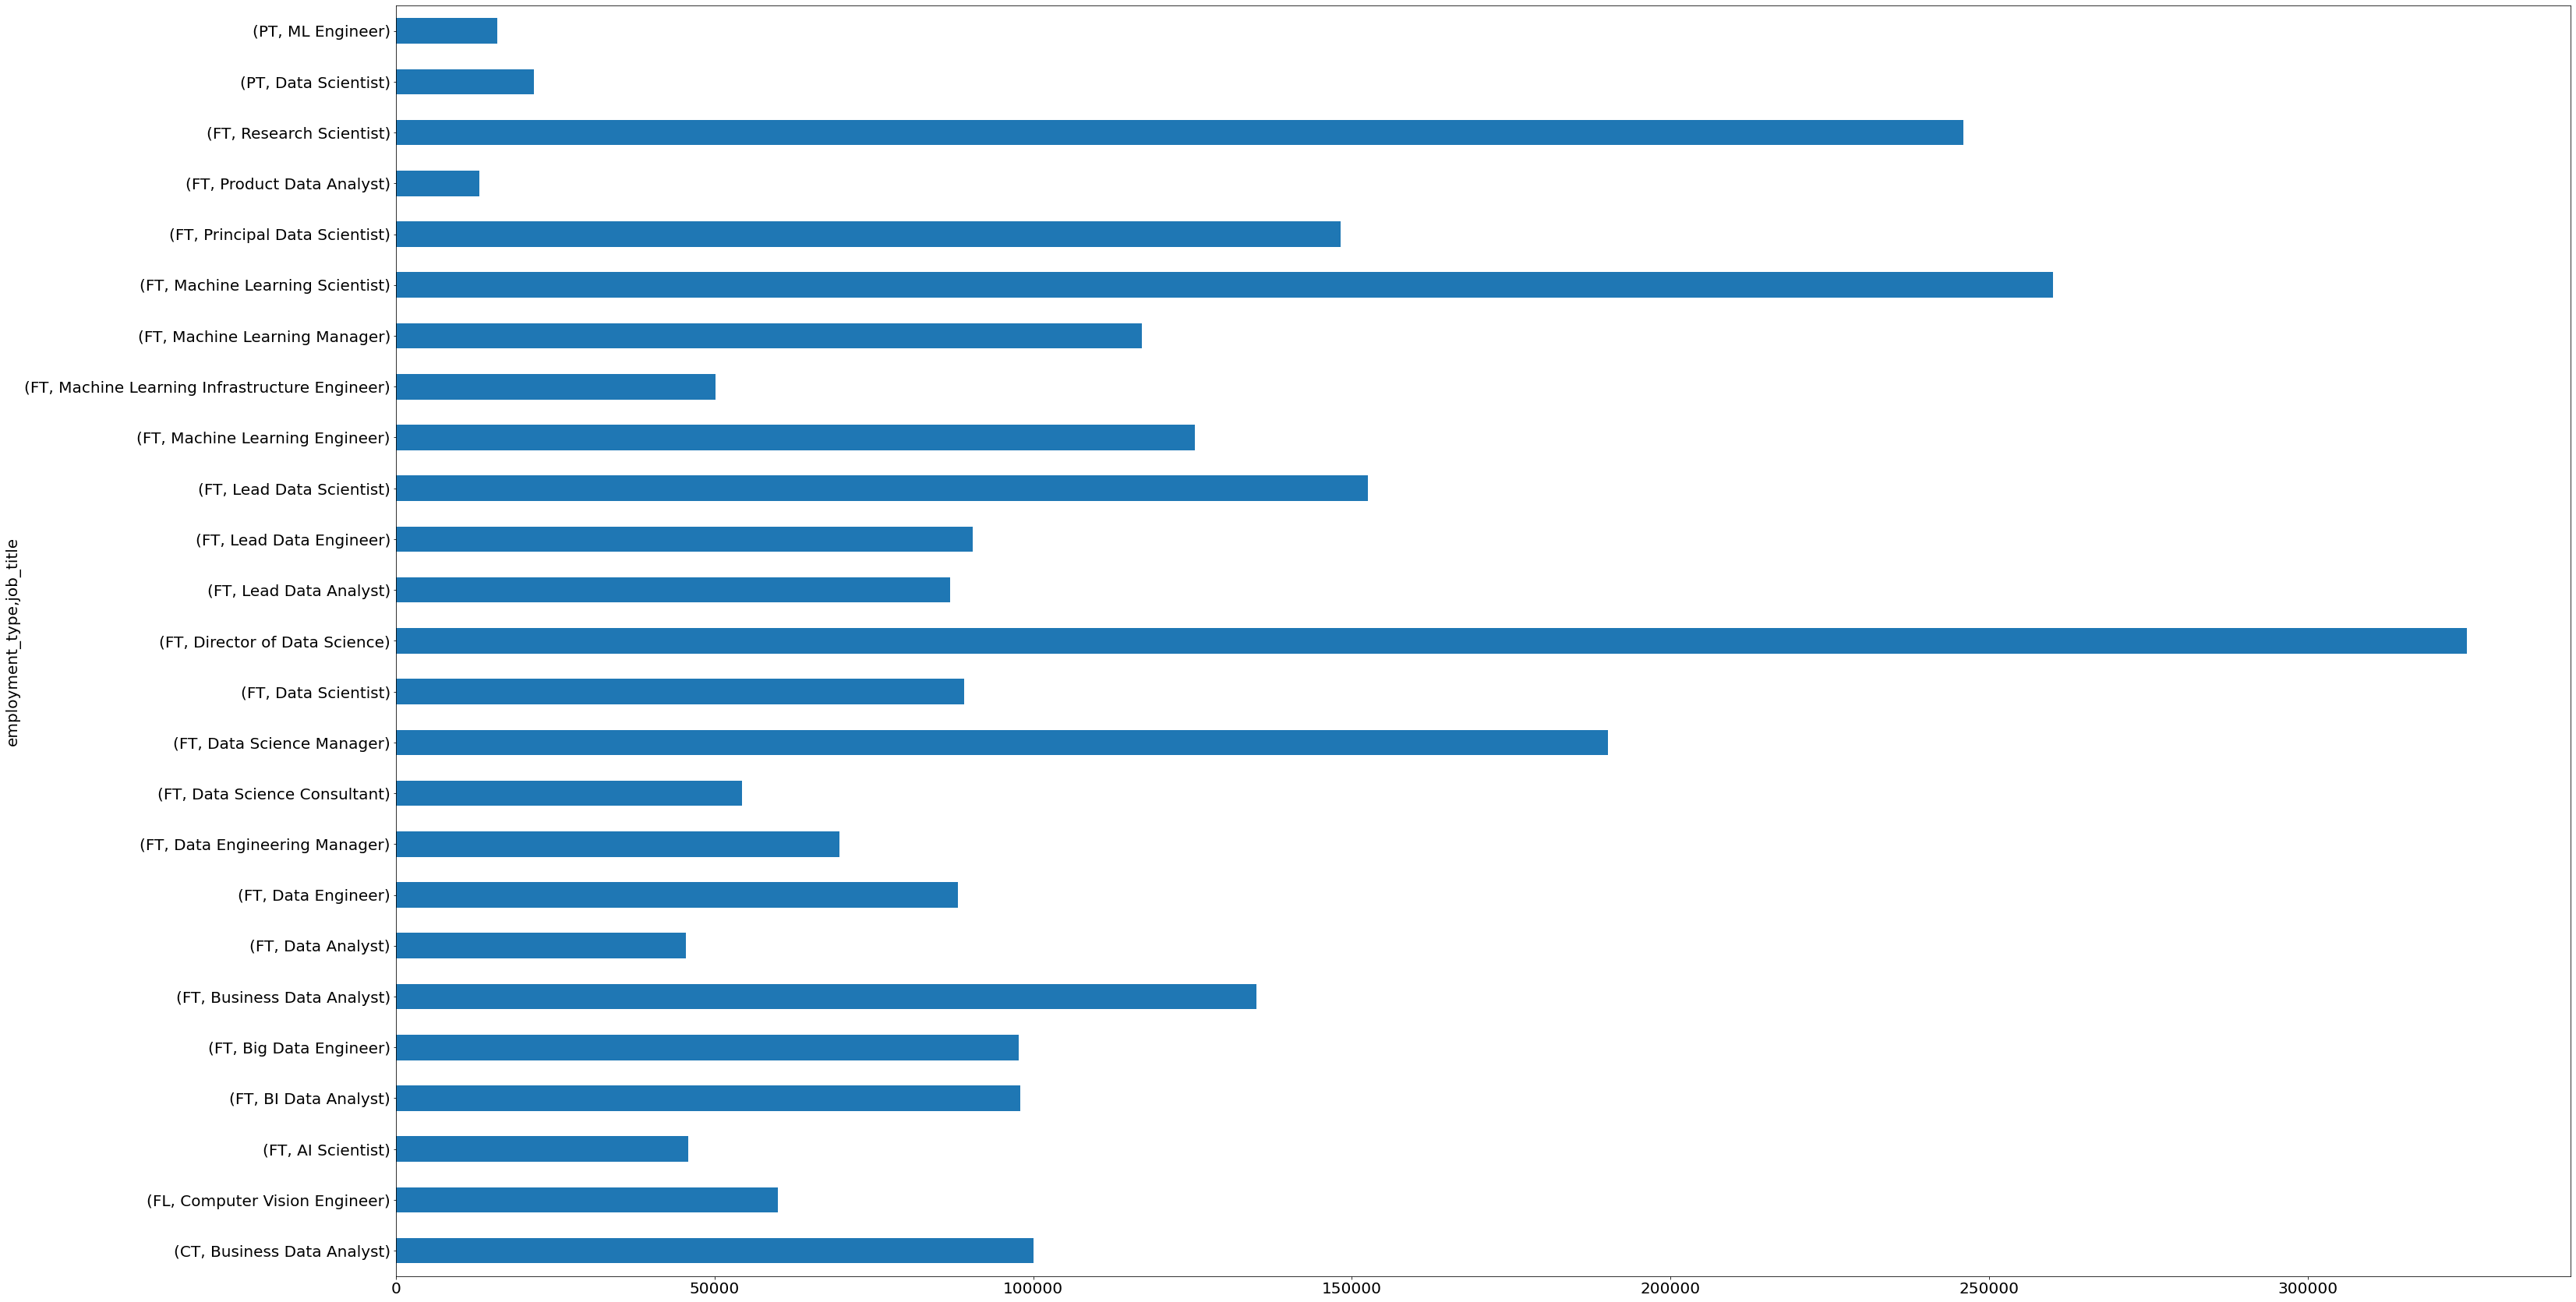

In [103]:
#prikaz plata po employment_type

#izbaceni su podaci koji nedostaju 
c=df.groupby(['employment_type','job_title','work_year'])['salary_in_usd'].mean().unstack()
c1=c[~c['2020'].isnull()]['2020']
c1.plot(kind='barh',figsize=(50,30),rot=0,stacked=True)